In [2]:
#we already have a db service running @ localhost:27017
from pymongo import MongoClient

#for dataframe usage
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#

In [3]:
client = MongoClient('mongodb://localhost:27017/')
db= client['dbmg']

### Tables

* checkins
* ratings
* socialgraph
* users
* venues

In [7]:
# we will use mongo structure to sample
# { $sample: { size: <positive integer> } }


#to transform mondgodb query to pandas dataframe, save list() of coll.find()
#then pass that variable through pd.DataFrame()
def sample_table(table, sample_size):
    
    query = { '$sample' : { 'size' : sample_size }} 
    
    cursor_list = list(db[table].aggregate([query]))
    df = pd.DataFrame(cursor_list)
    
    return(df)

In [41]:
#sample of each df for review
checkins = sample_table('checkins', 1000)
ratings = sample_table('ratings', 1000)
socialgraph = sample_table('socialgraph', 100000)
users = sample_table('users', 1000)
venues = sample_table('venues', 1000)

In [116]:
checkins.head(1)

,,_id,created_at,id,latitude,longitude,user_id,venue_id
0,390026,59922811ef1d5d90234fe0c6,2012-01-25 20:22:58,465826,27.9494,-82.4651,778202.0,1206.0


In [117]:
ratings.head(1)

,,_id,rating,user_id,venue_id
0,230749,5992281aef1d5d90235d0e09,2.0,17863,777721.0


In [119]:
socialgraph.head(1)

,,_id,first_user_id,second_user_id
0,18003600,599228b9ef1d5d9023976ea3,935,1029295.0


In [120]:
users.head(1)

,,_id,id,latitude,longitude
0,498063,59922906ef1d5d902329f49e,1971104,38.8339,-104.821


In [121]:
venues.head(1)

,,_id,id,latitude,longitude
0,757431,5992291def1d5d90234ecf36,148615,30.320767,-81.460544


In [42]:
# plt.hist(ratings['rating'])

In [46]:
#when do people check in
#correlation between peoples checkins and friends?
#correlation between peoples checkins and average rating?
#

### What Days Do People Use FSQ Checkin?

In [43]:
day_key = {
    0 : 'monday',
    1 : 'tuesday',
    2 : 'wednesday',
    3 : 'thursday',
    4 : 'friday',
    5 : 'saturday',
    6 : 'sunday'
}

day_of_week = []


for day in pd.to_datetime(checkins.created_at):
    x = day.weekday()
    day_of_week.append(day_key[x])

In [44]:
dow = (pd.DataFrame(day_of_week))

In [45]:
dow[0].value_counts()

saturday     232
sunday       201
monday       192
friday       190
tuesday       94
wednesday     52
thursday      39
Name: 0, dtype: int64

### Shape of Friends

In [52]:
np.count_nonzero

<function numpy.core.multiarray.count_nonzero>

In [72]:
table = pd.pivot_table(socialgraph, values='second_user_id', index=['first_user_id'],
         aggfunc=np.count_nonzero)

In [76]:
table_desc = table.sort_values(ascending=False)
table_desc = table_desc[table_desc > 0]

In [84]:
table_desc.head(10)

Int64Index([   754,     56,     50,    512,     59,   1334,     47,     58,
                40,   1269,     52,   3089,    187,    204,   3935,     38,
              3097,    935,   2866,   1030,   1031,   2787,   4489,    465,
               101,     45,   2844,   2035,   1259,   3765,  74276,    625,
            148732,   4061,     48,   2474,    732,   3876,    756,  33514,
             71690, 147833, 147878,   3600,  70881,   3107, 148785,   4495,
               640,    307,  70006,   2403,   1396,  91587,    254,  26012,
               678,   1005,    910,   4091,    485,   2493,     61,   3657,
              4430, 147964,   4447,   1977,   3009,   1093,   2052,   4582,
            144267,   3893,   4330,   1897,  93222,  32939, 146734, 147609,
              3628,   3561, 148026,   3884,    281,  31195,    203,  90251,
              1328,    635,   2138,   1780,   4629,   2640,   4592,  71427,
              1658,  54953,    264,   3172],
           dtype='int64', name='first_user_

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


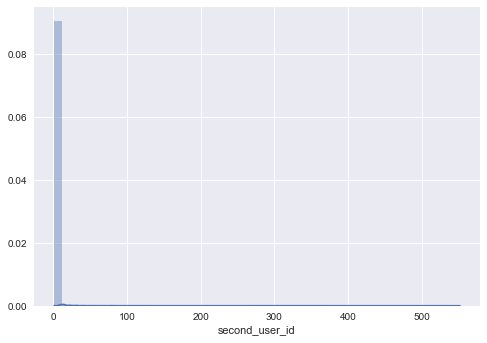

In [104]:
sns.distplot((table_desc))

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


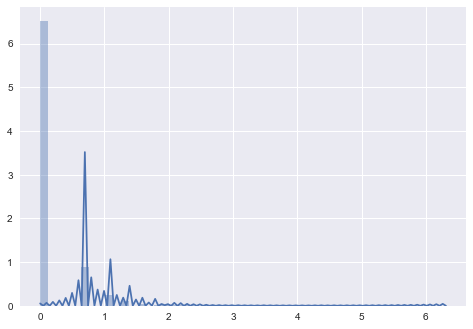

In [111]:
from numpy import log
sns.distplot(log(table_desc.values))

In [87]:
active_users = table_desc[:100].index

In [101]:
large_checkin_sample = sample_table('checkins', 100000)

In [91]:
checkin_counts = {}

for user in active_users:
    df = large_checkin_sample[large_checkin_sample.user_id == user]
    user_checkins_count = len(df)
    checkin_counts[user] = user_checkins_count
    

In [99]:
pd.Series(checkin_counts).sort_values(ascending=False)


1328      3
101       1
1977      1
1897      1
1269      0
754       0
756       0
910       0
935       0
1005      0
1030      0
1031      0
1093      0
1259      0
148785    0
678       0
1334      0
1396      0
1658      0
1780      0
2035      0
2052      0
2138      0
2403      0
732       0
640       0
148732    0
635       0
40        0
45        0
         ..
147833    0
147878    0
147964    0
148026    0
4592      0
4495      0
2787      0
4489      0
2844      0
2866      0
3009      0
3089      0
3097      0
3107      0
3172      0
3561      0
3600      0
3628      0
3657      0
3765      0
3876      0
3884      0
3893      0
3935      0
4061      0
4091      0
4330      0
4430      0
4447      0
38        0
dtype: int64

In [75]:
very_active_friender = socialgraph[socialgraph.first_user_id == 754]
very_active_friender.head()

,,_id,first_user_id,second_user_id
199,1213202,59922838ef1d5d902396f981,754,244639.0
222,1266548,59922838ef1d5d902397ca18,754,252292.0
721,2976840,59922845ef1d5d9023b1e99c,754,250165.0
847,1270128,59922838ef1d5d902397d818,754,119785.0
920,1209940,59922838ef1d5d902396ecbf,754,36545.0


In [88]:
# socialgraph

In [20]:
socialgraph.head()

,,_id,first_user_id,second_user_id
0,14960713,599228a2ef1d5d902368f476,133507,63584.0
1,1898764,5992283def1d5d9023a17228,74993,352238.0
2,21619204,599228d6ef1d5d9023cea83a,749096,725599.0
3,14563149,5992289eef1d5d902362e1ed,172735,43373.0
4,487848,59922833ef1d5d90238be541,59,39054.0


In [124]:
db.command("dbstats")

{'avgObjSize': 73.58613805312548,
 'collections': 5,
 'dataSize': 2518602724.0,
 'db': 'dbmg',
 'indexSize': 310673408.0,
 'indexes': 5,
 'numExtents': 0,
 'objects': 34226592,
 'ok': 1.0,
 'storageSize': 867368960.0,
 'views': 0}

In [130]:
cols = ['checkins',
'ratings',
'socialgraph',
'users',
'venues']

for x in cols:
    a = db.command("collstats", x)
    print(x,'\n')
    print(a['count'])
    print('\n')

checkins 

1021966


ratings 

2809580


socialgraph 

27098487


users 

2153469


venues 

1143090




### Looking @ number of nodes in 100,000 random social relationships

In [79]:
import networkx as nx
G=nx.Graph()


In [80]:
for index, row in socialgraph.iterrows():
    G.add_edge(row.first_user_id,row.second_user_id)

In [81]:
G.number_of_nodes()

112406

In [ ]:
client.close()